### Importación de datos



In [20]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [21]:
# Ingreso total por tienda
ingresos = {
    "tienda1": tienda["Precio"].sum(),
    "tienda2": tienda2["Precio"].sum(),
    "tienda3": tienda3["Precio"].sum(),
    "tienda4": tienda4["Precio"].sum(),
}

# Mostrar resultados
for nombre, ingreso in ingresos.items():
    print(f"{nombre}: ${ingreso:,.2f}")


tienda1: $1,150,880,400.00
tienda2: $1,116,343,500.00
tienda3: $1,098,019,600.00
tienda4: $1,038,375,700.00


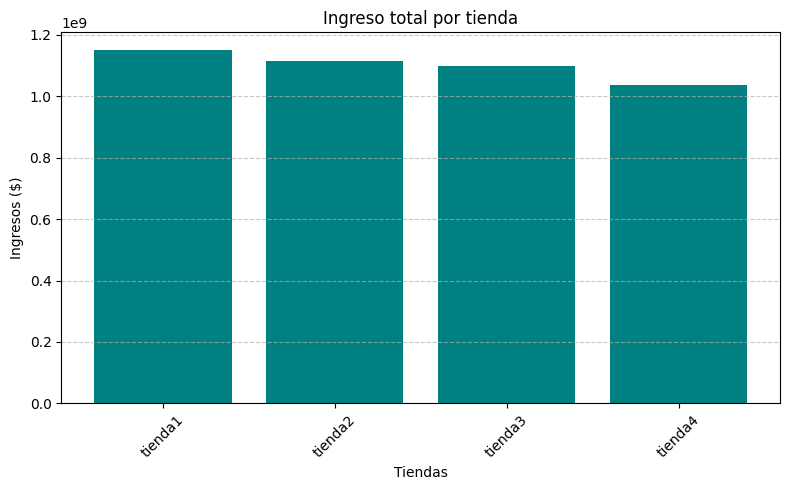

In [22]:
# Convertir diccionario en listas para graficar
nombres_tiendas = list(ingresos.keys())
valores_ingresos = list(ingresos.values())

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, valores_ingresos, color='teal')
plt.title('Ingreso total por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
# Agrupar por categoría y contar productos vendidos por tienda
categorias_tienda1 = tienda["Categoría del Producto"].value_counts()
categorias_tienda2 = tienda2["Categoría del Producto"].value_counts()
categorias_tienda3 = tienda3["Categoría del Producto"].value_counts()
categorias_tienda4 = tienda4["Categoría del Producto"].value_counts()

# Mostrar los resultados
print("Ventas por categoría - Tienda 1:\n", categorias_tienda1, "\n")
print("Ventas por categoría - Tienda 2:\n", categorias_tienda2, "\n")
print("Ventas por categoría - Tienda 3:\n", categorias_tienda3, "\n")
print("Ventas por categoría - Tienda 4:\n", categorias_tienda4, "\n")



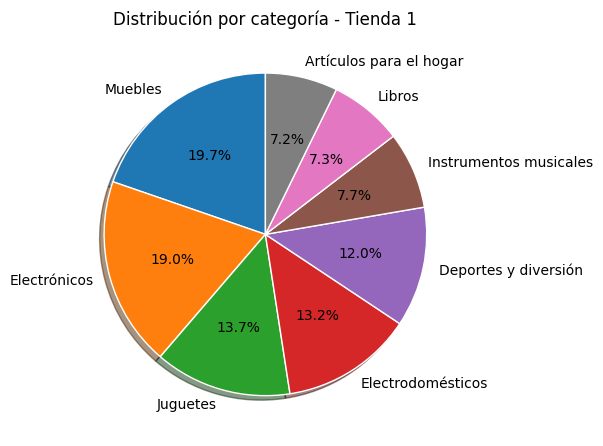

In [27]:
# Gráfico de pastel para Tienda 1
plt.figure(figsize=(6, 6))
categorias_tienda1.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("Distribución por categoría - Tienda 1")
plt.ylabel("")  # Elimina el label del eje Y
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [24]:
# Calcular promedio de calificaciones por tienda
calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean(),
}

# Mostrar resultados con 2 decimales
for tienda, promedio in calificaciones.items():
    print(f"{tienda}: {promedio:.2f}")


Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


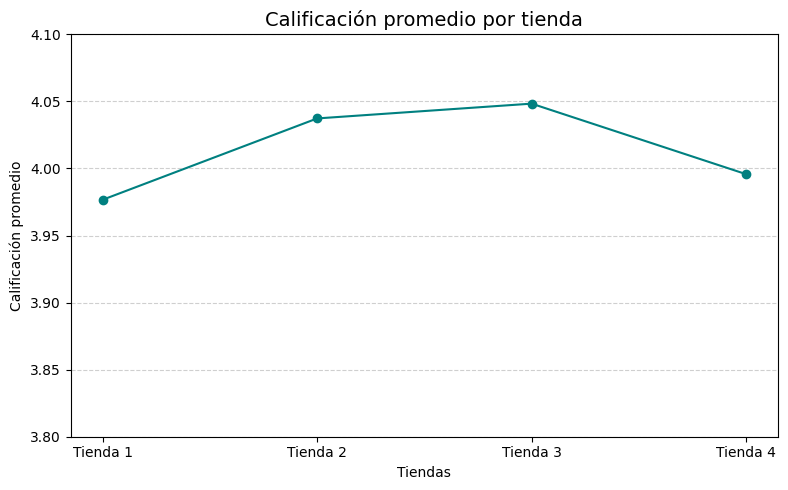

In [28]:
# Datos de calificación promedio por tienda
tiendas = list(calificaciones.keys())
promedios = list(calificaciones.values())

# Crear gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(tiendas, promedios, marker='o', linestyle='-', color='teal')

# Estética del gráfico
plt.title("Calificación promedio por tienda", fontsize=14)
plt.xlabel("Tiendas")
plt.ylabel("Calificación promedio")
plt.ylim(3.8, 4.1)  # Ajuste de escala para claridad
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Re-cargar los DataFrame para evitar errores
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Contar productos vendidos por tienda
productos_tienda1 = tienda["Producto"].value_counts()
productos_tienda2 = tienda2["Producto"].value_counts()
productos_tienda3 = tienda3["Producto"].value_counts()
productos_tienda4 = tienda4["Producto"].value_counts()

# Mostrar Top 3 productos más vendidos
print("🔝 Más vendidos - Tienda 1:\n", productos_tienda1.head(3), "\n")
print("🔝 Más vendidos - Tienda 2:\n", productos_tienda2.head(3), "\n")
print("🔝 Más vendidos - Tienda 3:\n", productos_tienda3.head(3), "\n")
print("🔝 Más vendidos - Tienda 4:\n", productos_tienda4.head(3), "\n")

# Mostrar Bottom 3 productos menos vendidos
print("🔻 Menos vendidos - Tienda 1:\n", productos_tienda1.tail(3), "\n")
print("🔻 Menos vendidos - Tienda 2:\n", productos_tienda2.tail(3), "\n")
print("🔻 Menos vendidos - Tienda 3:\n", productos_tienda3.tail(3), "\n")
print("🔻 Menos vendidos - Tienda 4:\n", productos_tienda4.tail(3), "\n")


C:\Users\sr031\AppData\Local\Temp\ipykernel_16248\957359330.py:17: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sr031\AppData\Local\Temp\ipykernel_16248\957359330.py:17: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\sr031\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sr031\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


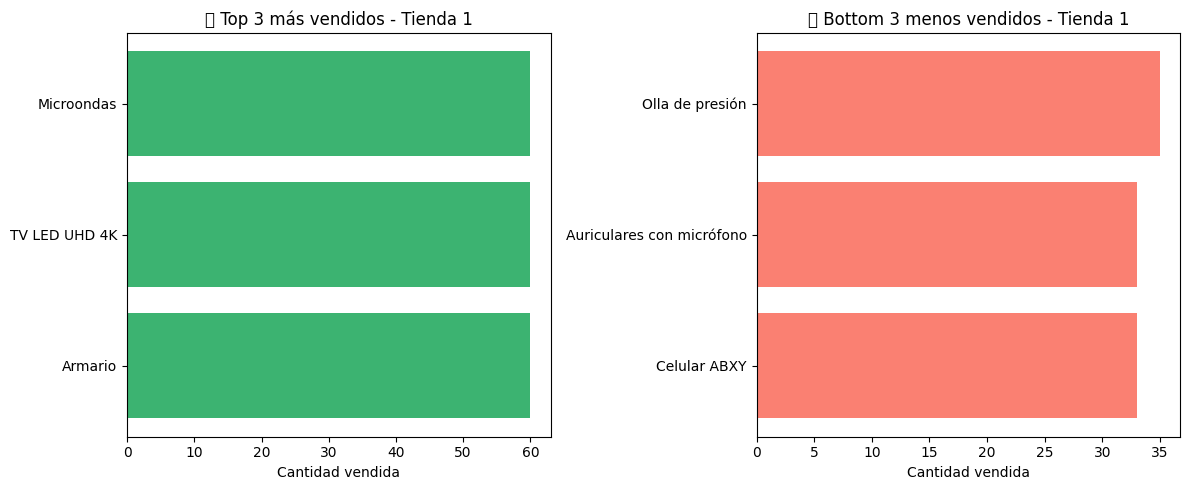

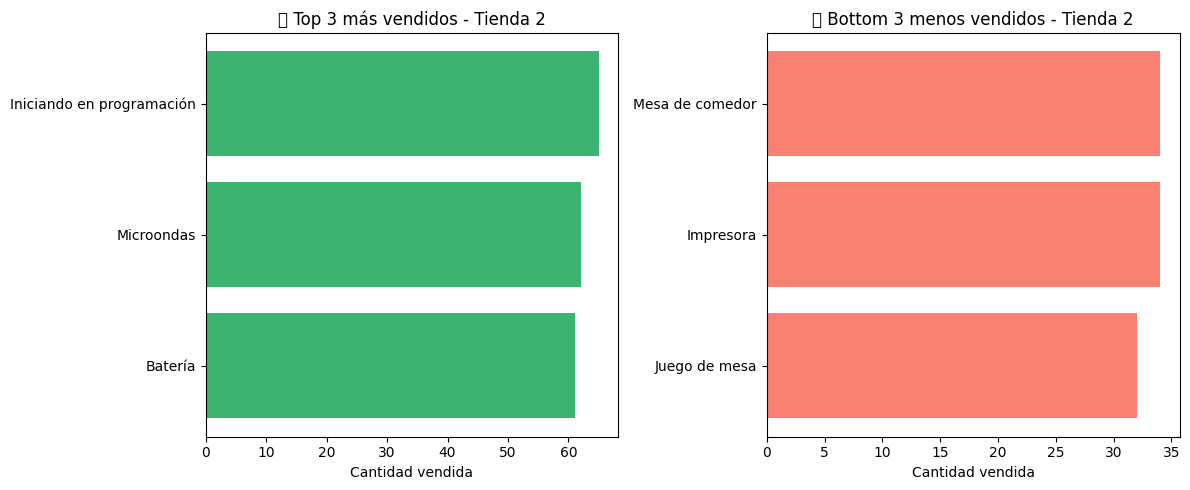

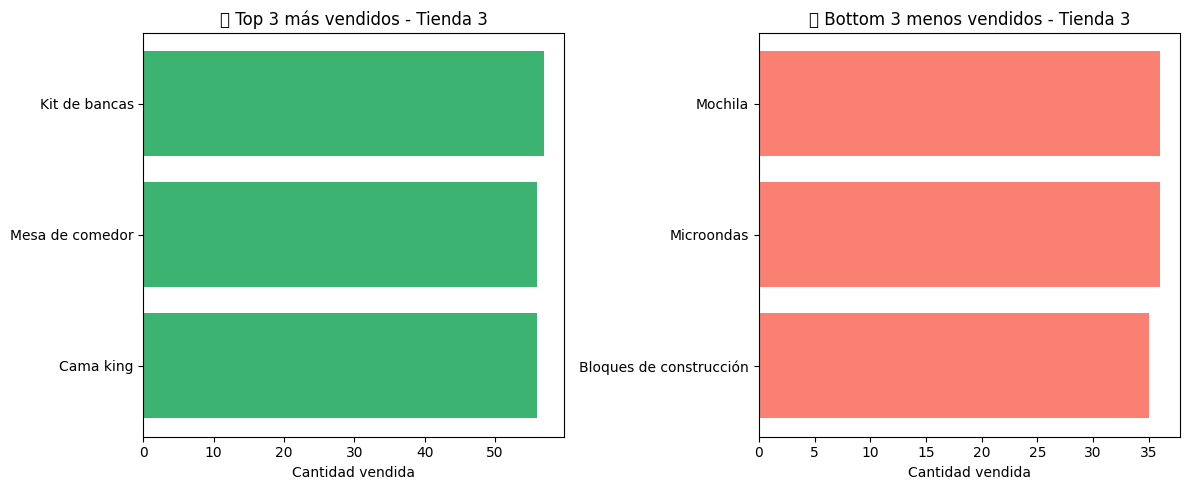

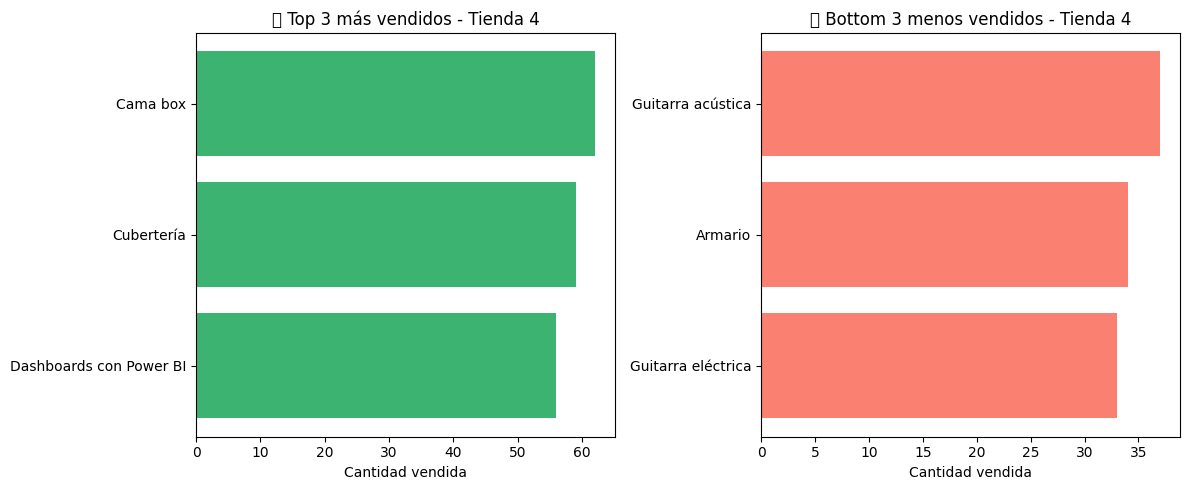

In [29]:
# Función para graficar
def graficar_top_bottom(productos, tienda_nombre):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # --- Top 3 productos ---
    top = productos.head(3)
    axs[0].barh(top.index[::-1], top.values[::-1], color='mediumseagreen')
    axs[0].set_title(f"🔝 Top 3 más vendidos - {tienda_nombre}")
    axs[0].set_xlabel("Cantidad vendida")

    # --- Bottom 3 productos ---
    bottom = productos.tail(3)
    axs[1].barh(bottom.index[::-1], bottom.values[::-1], color='salmon')
    axs[1].set_title(f"🔻 Bottom 3 menos vendidos - {tienda_nombre}")
    axs[1].set_xlabel("Cantidad vendida")

    plt.tight_layout()
    plt.show()

# Llamar la función para cada tienda
graficar_top_bottom(productos_tienda1, "Tienda 1")
graficar_top_bottom(productos_tienda2, "Tienda 2")
graficar_top_bottom(productos_tienda3, "Tienda 3")
graficar_top_bottom(productos_tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [26]:
# Calcular costo de envío promedio por tienda
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean(),
}

# Mostrar resultados con formato de moneda
for tienda, costo in envio_promedio.items():
    print(f"{tienda}: ${costo:,.2f}")


Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


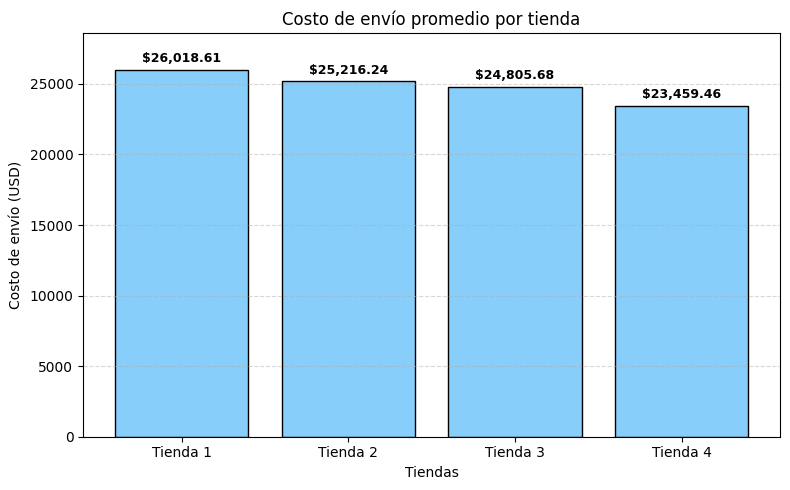

In [30]:

# Datos promedio que ya calculaste
tiendas = list(envio_promedio.keys())
costos = list(envio_promedio.values())

# Crear gráfica de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, costos, color='lightskyblue', edgecolor='black')

# Añadir etiquetas con el valor en formato monetario
for bar, costo in zip(bars, costos):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300,
             f"${costo:,.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

# Títulos y etiquetas
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo de envío (USD)")
plt.ylim(0, max(costos) * 1.10)  # Dejar espacio para los textos
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()